## Project 1
#### Sample data from https://www.transtats.bts.gov/DatabaseInfo.asp?DB_ID=120&Link=0
The data set contains information and metrics for commercial domestic (USA) airline flights that departed from 2 separate airports located in Houston, TX (IAH and HOU) during the 2011 calendar year.
#### A summary / description of the data set can be found here:
https://cran.r-project.org/web/packages/hflights/hflights.pdf
### Three interesting research / analytical questions:
1. Which carrier has the lowest possibility to delay the departure of their flights?
2. Which destination from IAH/HOU shows the worst ArrDelay(arrival delay, in minutes) record?
3. Which carrier canceled their flights most frequently?

__Who would care about the answer to the questions and how they might make use of the results of your analysis.__

I thought there are many travelers who don't want to screw their plans up because of flight delay/cancellation/wrong destination choice. I guessed that they want to know which airline has the lowest-risk about that.

#### =========================================================================================

### Load the data set 
#### This dataset contains all flights departing from Houston in 2011

In [44]:
import numpy as np
import pandas as pd
hflights=pd.read_csv('https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv')
hflights.head(10)
#too many data(20,000 rows), so I used .head and .tail to show the first 10 rows and the last 10 rows.  

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0
5,2011,1,6,4,1359.0,1503.0,AA,428,N262AA,64.0,...,-7.0,-1.0,IAH,DFW,224,6.0,13.0,0,NaN,0
6,2011,1,7,5,1359.0,1509.0,AA,428,N493AA,70.0,...,-1.0,-1.0,IAH,DFW,224,12.0,15.0,0,NaN,0
7,2011,1,8,6,1355.0,1454.0,AA,428,N477AA,59.0,...,-16.0,-5.0,IAH,DFW,224,7.0,12.0,0,NaN,0
8,2011,1,9,7,1443.0,1554.0,AA,428,N476AA,71.0,...,44.0,43.0,IAH,DFW,224,8.0,22.0,0,NaN,0
9,2011,1,10,1,1443.0,1553.0,AA,428,N504AA,70.0,...,43.0,43.0,IAH,DFW,224,6.0,19.0,0,NaN,0


In [45]:
hflights.tail(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
19990,2011,2,25,5,1029.0,1341.0,CO,1690,N33294,132.0,...,-23.0,-1.0,IAH,MIA,964,10.0,15.0,0,NaN,0
19991,2011,2,25,5,1451.0,1645.0,CO,1695,N14231,234.0,...,105.0,96.0,IAH,LAX,1379,8.0,25.0,0,NaN,0
19992,2011,2,25,5,1903.0,2034.0,CO,1711,N16648,91.0,...,1.0,-7.0,IAH,OKC,395,5.0,25.0,0,NaN,0
19993,2011,2,25,5,908.0,1137.0,CO,1714,N32404,269.0,...,10.0,-2.0,IAH,SMF,1609,7.0,15.0,0,NaN,0
19994,2011,2,25,5,2111.0,2236.0,CO,1717,N37290,205.0,...,-9.0,1.0,IAH,SAN,1303,3.0,12.0,0,NaN,0
19995,2011,2,25,5,1126.0,1333.0,CO,1719,N19621,187.0,...,8.0,-4.0,IAH,MTJ,926,5.0,30.0,0,NaN,0
19996,2011,2,25,5,941.0,1111.0,CO,1723,N37298,210.0,...,0.0,11.0,IAH,ONT,1334,5.0,12.0,0,NaN,0
19997,2011,2,25,5,722.0,948.0,CO,1746,N37408,146.0,...,-17.0,-3.0,IAH,ORD,925,17.0,14.0,0,NaN,0
19998,2011,2,25,5,1909.0,2216.0,CO,1748,N27239,127.0,...,-10.0,12.0,IAH,FLL,965,6.0,15.0,0,NaN,0
19999,2011,2,25,5,1255.0,1553.0,CO,1757,N14604,118.0,...,-3.0,5.0,IAH,ATL,689,13.0,22.0,0,NaN,0


#### =========================================================================================

### 1) Which carrier has the lowest possibility to delay the departure of their flights?

In [46]:
carrier=hflights.groupby(['UniqueCarrier']).mean() 
# UniqueCarrier= unique abbreviation for a carrier
# calculate a 'mean' value to show each carrier's mean value of DepDelay
print(carrier)

                 Year     Month  DayofMonth  DayOfWeek      DepTime  \
UniqueCarrier                                                         
AA             2011.0  1.473988   15.298651   3.984586  1241.401186   
AS             2011.0  1.474576   15.288136   4.033898  1832.949153   
B6             2011.0  1.490000   15.500000   3.980000  1153.925532   
CO             2011.0  1.112299   17.111127   4.122987  1429.993214   
DL             2011.0  1.000000   16.825581   3.972868  1000.071429   
EV             2011.0  1.000000   14.943396   4.160377  1428.886598   
F9             2011.0  1.000000   15.661290   4.064516  1158.709677   
FL             2011.0  1.000000   16.090278   3.881944  1309.533835   
MQ             2011.0  1.000000   16.030211   4.006042  1281.840000   
OO             2011.0  1.000000   17.277539   4.011445  1371.891618   
UA             2011.0  1.000000   14.257426   4.009901  1243.969697   
US             2011.0  1.000000   15.879870   4.038961  1165.525084   
WN    

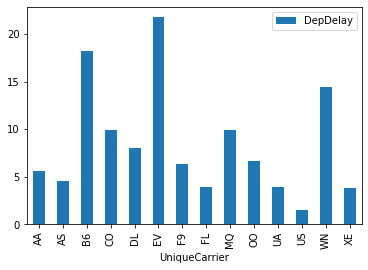

In [47]:
# crate a bar chart to show the result in visual way
BC=carrier.plot.bar(y='DepDelay')
# DepDelay:departure delays
BC

This statistical value summary indicates each airline's departure delays. Therefore, according to the result, answer is __US airline. US airline has the lowest possibility to delay the departure of their flights.__

#### =========================================================================================

### 2) Which destination from IAH/HOU shows the worst ArrDelay(arrival delay, in minutes) record?

In [142]:
# filtering destination from IAH airport
IAH=hflights[hflights['Origin']=='IAH']
# filtering destination from HOU airport
HOU=hflights[hflights['Origin']=='HOU']

In [102]:
# ArrDelay = arrival delays, in minutes
# show ArrDelay records about each destination from IAH by sorting with ArrDelay value
IAH_ArrDely=IAH.sort_values(by='ArrDelay', ascending=False)
IAH_ArrDely

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
2502,2011,1,20,4,635.0,807.0,CO,59,N74856,152.0,...,775.0,780.0,IAH,DEN,862,6.0,20.0,0,NaN,0
6532,2011,1,15,6,1737.0,2035.0,DL,1590,N762NC,118.0,...,487.0,488.0,IAH,ATL,689,6.0,18.0,0,NaN,0
8256,2011,1,5,3,2025.0,2304.0,EV,5003,N137EV,99.0,...,445.0,465.0,IAH,ATL,689,10.0,11.0,0,NaN,0
936,2011,1,28,5,1516.0,1916.0,CO,1,N77066,480.0,...,326.0,351.0,IAH,HNL,3904,7.0,10.0,0,NaN,0
8266,2011,1,24,1,1742.0,2050.0,EV,5003,N723EV,128.0,...,311.0,302.0,IAH,ATL,689,15.0,30.0,0,NaN,0
12994,2011,1,27,4,2128.0,18.0,XE,2008,N11127,110.0,...,298.0,306.0,IAH,JAX,817,4.0,11.0,0,NaN,0
8811,2011,1,11,2,1833.0,2248.0,MQ,3786,N9EAMQ,255.0,...,288.0,188.0,IAH,ORD,925,109.0,18.0,0,NaN,0
8305,2011,1,24,1,1930.0,2316.0,EV,5214,N708EV,166.0,...,276.0,275.0,IAH,DTW,1076,5.0,41.0,0,NaN,0
1261,2011,1,27,4,1527.0,2202.0,CO,810,N78009,335.0,...,267.0,137.0,IAH,EWR,1400,140.0,19.0,0,NaN,0
4383,2011,1,11,2,1442.0,1727.0,CO,1646,N30401,165.0,...,264.0,252.0,IAH,ORD,925,16.0,18.0,0,NaN,0


In [132]:
# showing carrier and ArrDelay records from IAH
IAH_ArrDelay=IAH_ArrDely[['Dest','ArrDelay']]
IAH_ArrDelay

,Dest,ArrDelay
2502,DEN,775.0
6532,ATL,487.0
8256,ATL,445.0
936,HNL,326.0
8266,ATL,311.0
12994,JAX,298.0
8811,ORD,288.0
8305,DTW,276.0
1261,EWR,267.0
4383,ORD,264.0


In [135]:
# show what destination from IAH have the worst ArrDely record (based on frequency)
Fre_IAH_Delay=IAH_ArrDely['Dest'].value_counts().head(10)# pick 10 values for creating a chart
Fre_IAH_Delay

DFW    528
ORD    502
CLT    395
ATL    381
EWR    357
MSY    350
PHX    340
SAT    334
AUS    332
DEN    323
Name: Dest, dtype: int64

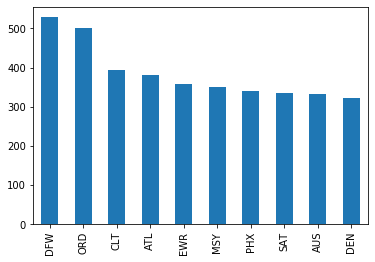

In [136]:
# show the result above by chart
IAH_bar=Fre_IAH_Delay.plot.bar(y='ArrDelay')

In [125]:
# show ArrDelay records about each destination from HOU by sorting with ArrDelay value
HOU_ArrDely=HOU.sort_values(by='ArrDelay', ascending=False)
HOU_ArrDely

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
19215,2011,2,20,7,1107.0,1517.0,B6,620,N766JB,190.0,...,240.0,247.0,HOU,JFK,1428,3.0,10.0,0,NaN,0
19187,2011,2,3,4,1938.0,2341.0,B6,624,N552JB,183.0,...,221.0,243.0,HOU,JFK,1428,6.0,15.0,0,NaN,0
8711,2011,1,30,7,914.0,1035.0,MQ,3265,N679MQ,81.0,...,205.0,194.0,HOU,DFW,247,6.0,21.0,0,NaN,0
11507,2011,1,26,3,1813.0,2028.0,WN,27,N723SW,135.0,...,203.0,218.0,HOU,MDW,937,5.0,6.0,0,NaN,0
9350,2011,1,8,6,1342.0,1756.0,WN,2914,N292WN,194.0,...,196.0,192.0,HOU,PHL,1335,5.0,8.0,0,NaN,0
19226,2011,2,25,5,1824.0,2314.0,B6,624,N273JB,230.0,...,194.0,169.0,HOU,JFK,1428,3.0,59.0,0,NaN,0
11560,2011,1,27,4,2329.0,14.0,WN,3665,N660SW,45.0,...,179.0,179.0,HOU,AUS,148,5.0,11.0,0,NaN,0
9418,2011,1,9,7,22.0,117.0,WN,55,N506SW,55.0,...,167.0,172.0,HOU,HRL,276,2.0,7.0,0,NaN,0
9444,2011,1,9,7,1444.0,1648.0,WN,3348,N912WN,124.0,...,163.0,189.0,HOU,MDW,937,4.0,9.0,0,NaN,0
9670,2011,1,11,2,2009.0,2113.0,WN,386,N778SW,64.0,...,158.0,154.0,HOU,HRL,276,4.0,10.0,0,NaN,0


In [138]:
# showing carrier and ArrDelay records from HOU
HOU_ArrDelay=HOU_ArrDely[['Dest','ArrDelay']]
HOU_ArrDelay

,Dest,ArrDelay
19215,JFK,240.0
19187,JFK,221.0
8711,DFW,205.0
11507,MDW,203.0
9350,PHL,196.0
19226,JFK,194.0
11560,AUS,179.0
9418,HRL,167.0
9444,MDW,163.0
9670,HRL,158.0


In [139]:
# show what destination from HOU have the worst ArrDely record (based on frequency)
Fre_HOU_Delay=HOU_ArrDely['Dest'].value_counts().head(10)# pick 10 values for creating a chart
Fre_HOU_Delay

DAL    703
MSY    285
ATL    242
DFW    207
HRL    191
DEN    186
MDW    168
SAT    143
AUS    140
CRP    136
Name: Dest, dtype: int64

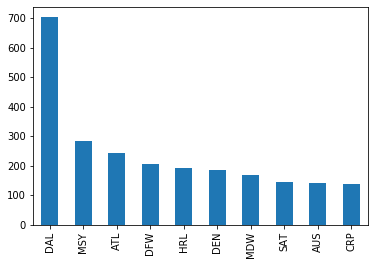

In [162]:
# creating a chart
HOU_bar=Fre_HOU_Delay.plot.bar(y='ArrDelay')

These two statistical values indicate what destination have the worst Arrdelay(arrival delay) records based on its frequency. According to the result, __from IAH, the answer is DFW. From HOU, the answer is DAL.__

#### =========================================================================================

### 3) Which carrier canceled their flights most frequently?

In [146]:
# filtering destination from IAH airport
IAH=hflights[hflights['Origin']=='IAH']
# filtering destination from HOU airport
HOU=hflights[hflights['Origin']=='HOU']

In [163]:
# grouping by carriers in IAH
can_IAH=IAH.groupby(['UniqueCarrier']).count()
can_IAH
# sorting data in order of Cancelled
Can_IAH=can_IAH.sort_values(by='Cancelled', ascending=False)
Can_IAH

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
UniqueCarrier,,,,,,,,,,,,,,,,,,,,
CO,6830,6830,6830,6830,6779,6777,6830,6779,6767,6767,6767,6779,6830,6830,6830,6777,6778,6830,53,6830
XE,6775,6775,6775,6775,6730,6722,6775,6730,6711,6711,6711,6730,6775,6775,6775,6722,6728,6775,48,6775
OO,699,699,699,699,692,690,699,699,689,689,689,692,699,699,699,690,692,699,7,699
AA,519,519,519,519,506,505,519,519,504,504,504,506,519,519,519,505,506,519,14,519
US,308,308,308,308,299,297,308,299,297,297,297,299,308,308,308,297,298,308,10,308
DL,171,171,171,171,160,160,171,171,160,160,160,160,171,171,171,160,160,171,11,171
MQ,124,124,124,124,123,123,124,124,123,123,123,123,124,124,124,123,123,124,1,124
UA,101,101,101,101,99,98,101,99,98,98,98,99,101,101,101,98,98,101,3,101
EV,95,95,95,95,86,85,95,95,85,85,85,86,95,95,95,85,86,95,9,95


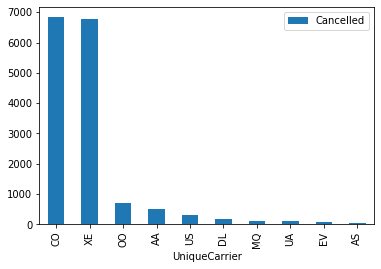

In [156]:
# creating a chart
Can_IAH_bar=Can_IAH.plot.bar(y='Cancelled')

In [164]:
# grouping by carriers in HOU
can_HOU=HOU.groupby(['UniqueCarrier']).count()
can_HOU
# sorting data in order of Cancelled
Can_HOU=can_HOU.sort_values(by='Cancelled', ascending=False)
Can_HOU

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
UniqueCarrier,,,,,,,,,,,,,,,,,,,,
WN,3708,3708,3708,3708,3672,3670,3708,3707,3667,3667,3667,3672,3708,3708,3708,3670,3672,3708,37,3708
MQ,207,207,207,207,202,202,207,207,202,202,202,202,207,207,207,202,202,207,5,207
FL,144,144,144,144,133,133,144,144,133,133,133,133,144,144,144,133,133,144,11,144
B6,100,100,100,100,94,94,100,100,93,93,93,94,100,100,100,94,94,100,6,100
DL,87,87,87,87,78,78,87,87,78,78,78,78,87,87,87,78,78,87,9,87
F9,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,0,62
EV,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,0,11


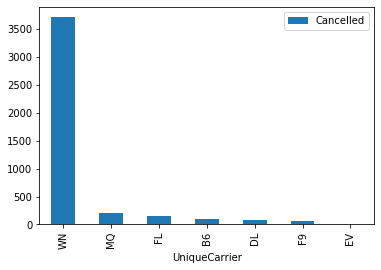

In [161]:
# creating a chart
Can_HOU_bar=Can_HOU.plot.bar(y='Cancelled')

These two statistical values indicate which carriers have most frequent cancelation records from each airport(IAH/HOU) According to the result, __from IAH, the answer is CO. From HOU, the answer is WN.__